In [1]:
from sklearn.model_selection import train_test_split
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

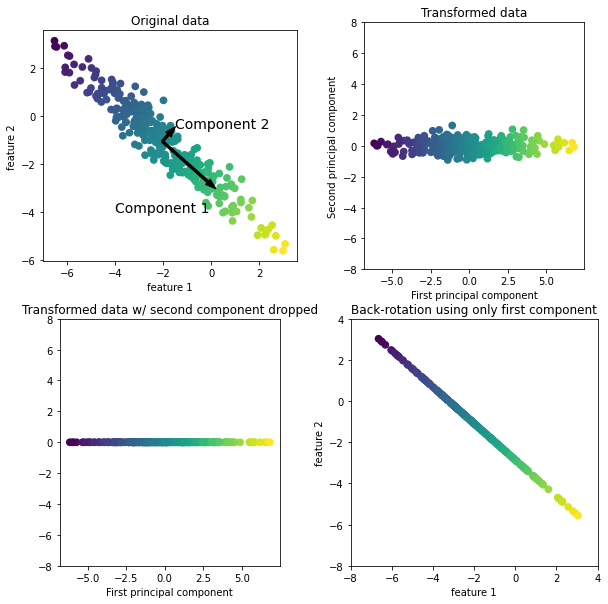

In [2]:
mglearn.plots.plot_pca_illustration()

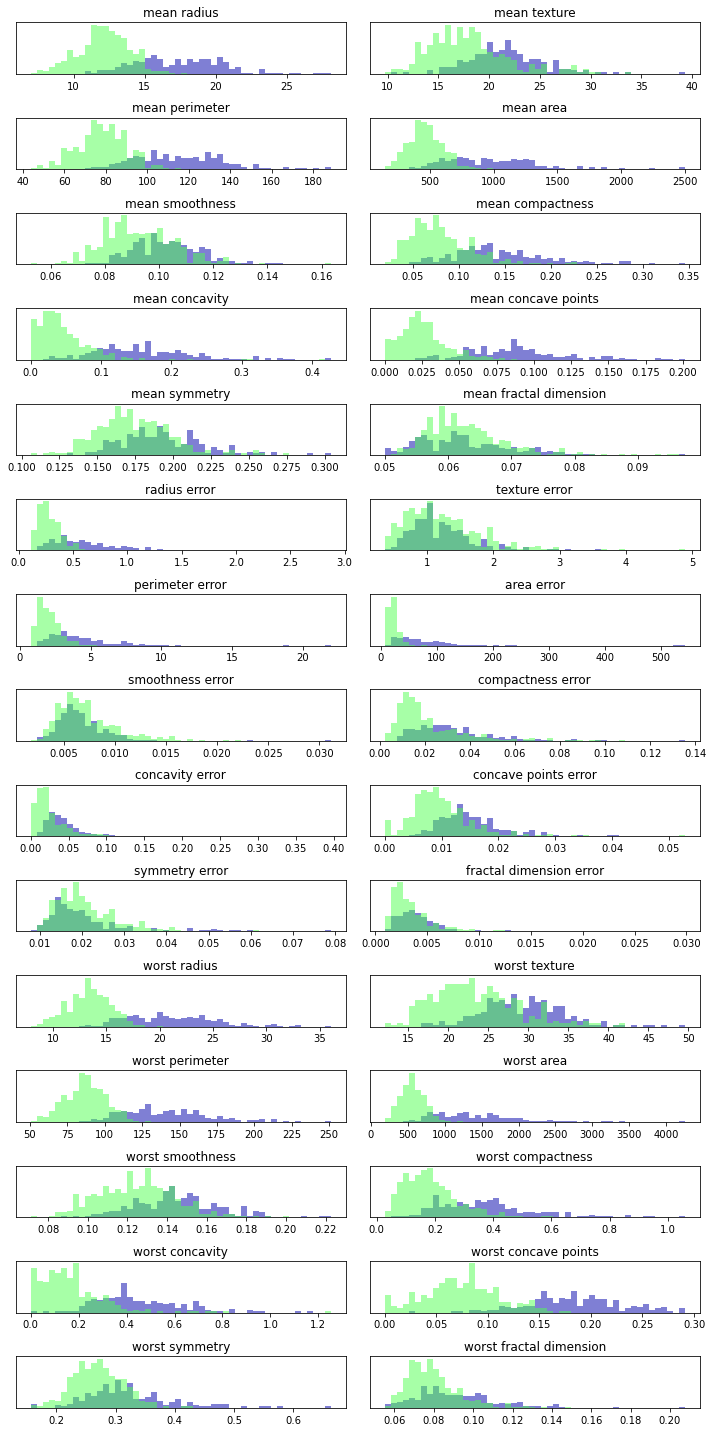

In [3]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())

fig.tight_layout()

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(str(X_scaled.shape))
print(str(X_pca.shape))

(569, 30)
(569, 2)


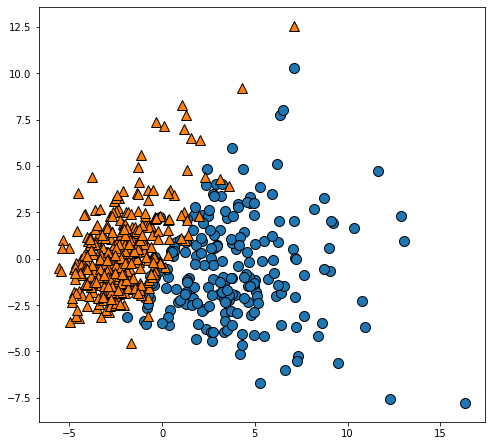

In [6]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.gca().set_aspect('equal')

In [7]:
print(pca.components_.shape)

(2, 30)


In [8]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

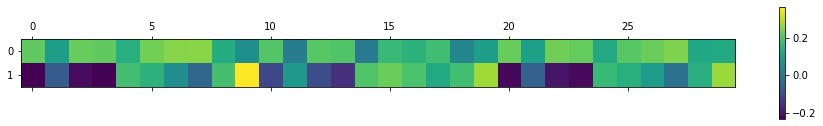

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()

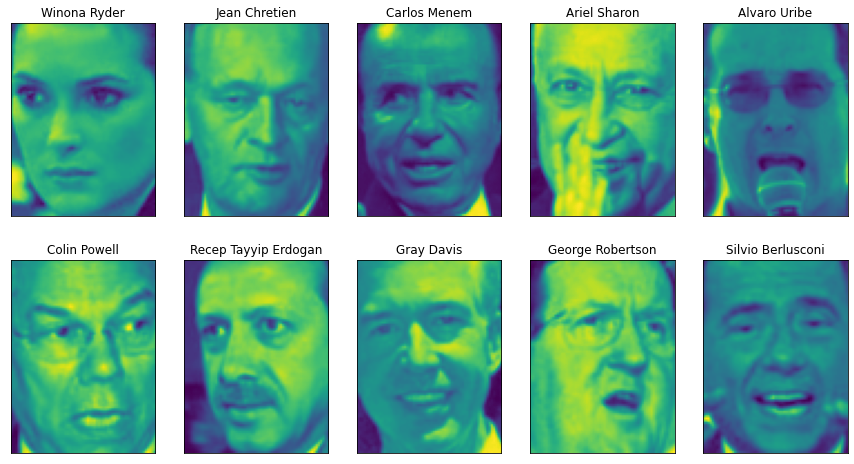

In [10]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw = {'xticks': (), 'yticks': ()})
for target, image,  ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


In [12]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25}, {1:3}".format(name, count), end='    ')
    if(i + 1) % 3 == 0:
        print()

Alejandro Toledo         ,  39    Alvaro Uribe             ,  35    Amelie Mauresmo          ,  21    
Andre Agassi             ,  36    Angelina Jolie           ,  20    Ariel Sharon             ,  77    
Arnold Schwarzenegger    ,  42    Atal Bihari Vajpayee     ,  24    Bill Clinton             ,  29    
Carlos Menem             ,  21    Colin Powell             , 236    David Beckham            ,  31    
Donald Rumsfeld          , 121    George Robertson         ,  22    George W Bush            , 530    
Gerhard Schroeder        , 109    Gloria Macapagal Arroyo  ,  44    Gray Davis               ,  26    
Guillermo Coria          ,  30    Hamid Karzai             ,  22    Hans Blix                ,  39    
Hugo Chavez              ,  71    Igor Ivanov              ,  20    Jack Straw               ,  28    
Jacques Chirac           ,  52    Jean Chretien            ,  55    Jennifer Aniston         ,  21    
Jennifer Capriati        ,  42    Jennifer Lopez           ,  21    Jerem

In [13]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

<ipython-input-13-801045b254b3>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [19]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.23255813953488372


/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: 

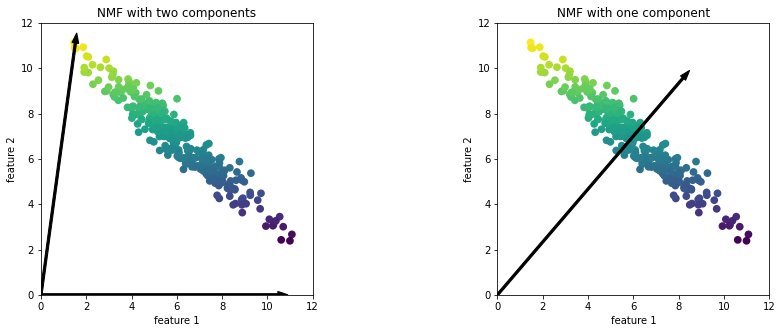

In [20]:
mglearn.plots.plot_nmf_illustration()

In [21]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: 

KeyboardInterrupt: 

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


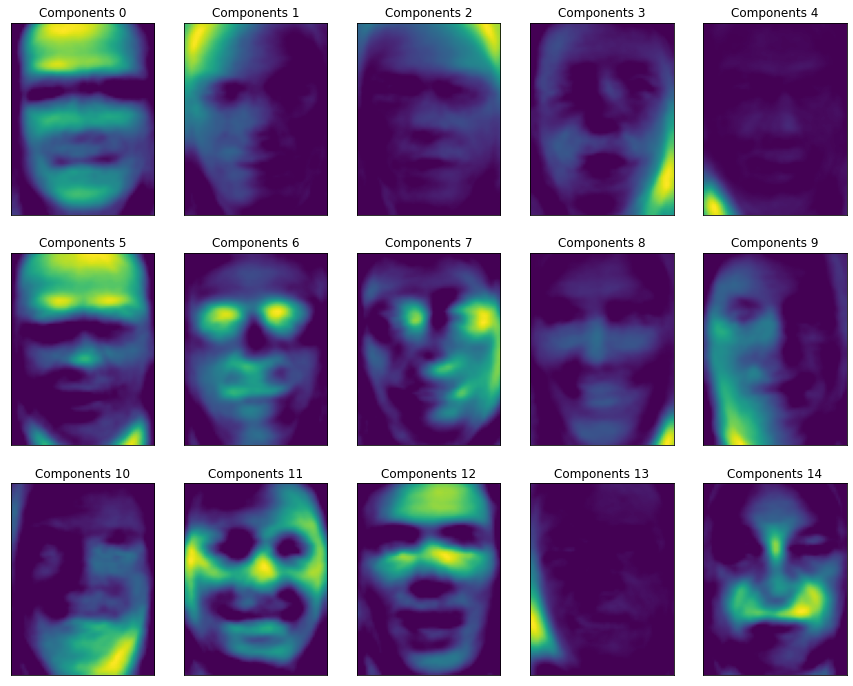

In [23]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                        subplot_kw={'xticks':(), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('Components {}'.format(i))

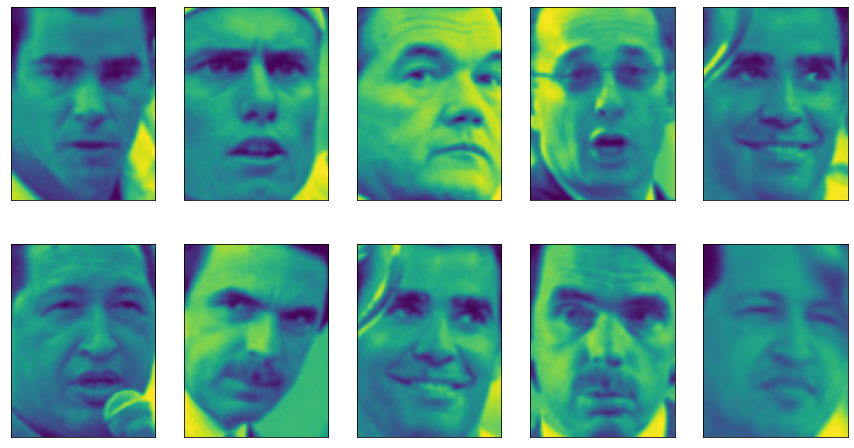

In [24]:
compn = 3 
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks':(), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

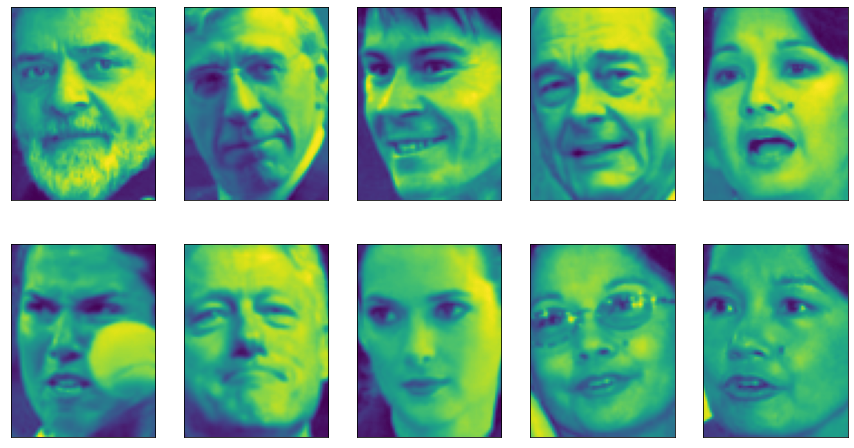

In [25]:
compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                        subplot_kw={'xticks':(), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

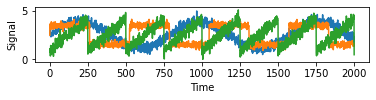

In [26]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [27]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print(X.shape)

(2000, 100)


In [28]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(S_.shape)

(2000, 3)


/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [29]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

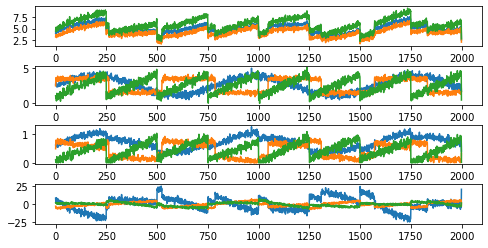

In [31]:
models = [X, S, S_, H]
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5})

for model, ax in zip(models, axes):
    ax.plot(model[:, :3], '-')

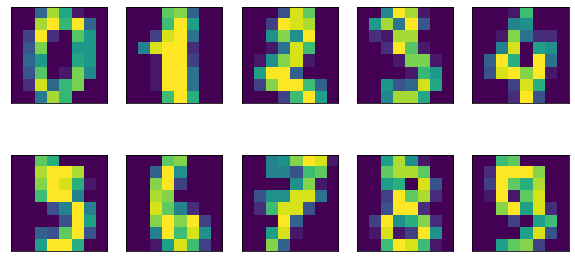

In [33]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                        subplot_kw={'xticks': (), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

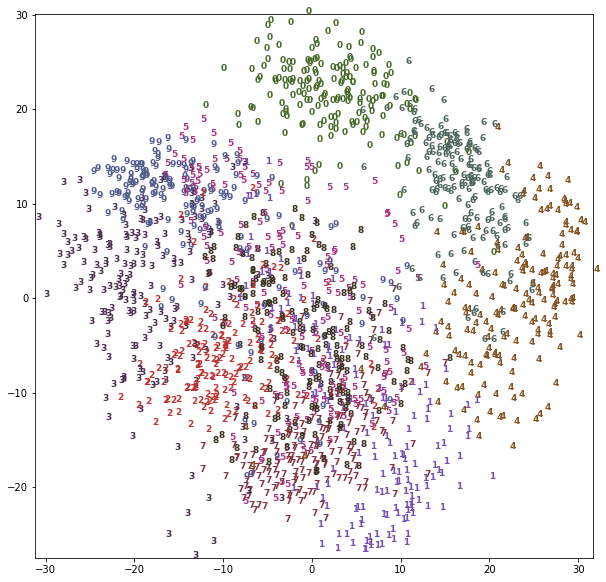

In [35]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525', 
         '#A83683', '#4E655E', '#853541', '#3A3120', '#535D8E']

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size':9})

In [37]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

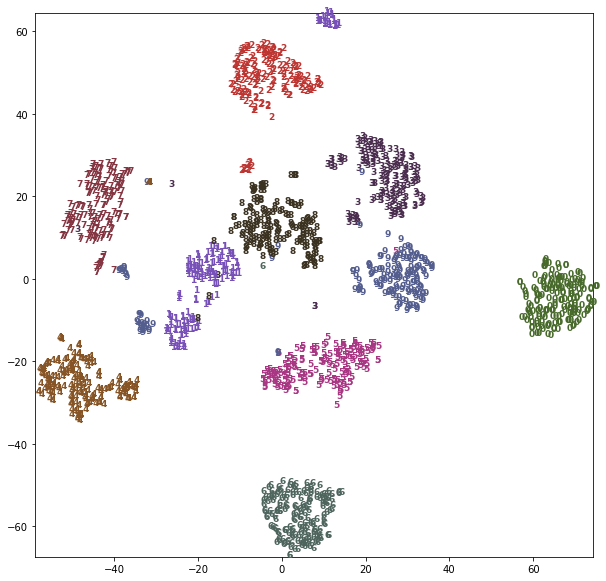

In [38]:

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size':9})